In [8]:
!pip install Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 33.8 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 58.9 MB/s 


# EDA via Basemap

In [1]:
import netCDF4 as nc

from netCDF4 import Dataset as NetCDFFile 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import numpy as np
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/w210_capstone_CEPWX/Kevin')
os.listdir()

['Kevin_Project_Proposal.gdoc',
 '3B-DAY.MS.MRG.3IMERG.20200601-S000000-E235959.V06.nc4',
 'temp.jpg']

In [4]:

### Read Data

fn = '/content/drive/MyDrive/w210_capstone_CEPWX/Kevin/'\
    '3B-DAY.MS.MRG.3IMERG.20200601-S000000-E235959.V06.nc4'
ds = nc.Dataset(fn)

### INSTRUCTIONS
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
time = ds.variables['time'][:]
prec = ds.variables['precipitationCal'][:]


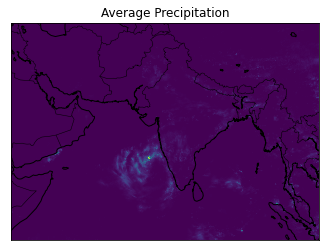

In [8]:
# mp = Basemap(projection='merc',
#              llcrnrlon = -122.541332,
#              llcrnrlat = 37.909534,
#              urcrnrlon = -121.804756,
#              urcrnrlat = 37.909534,
#              resolution = 'l'
#              )
mp = Basemap(projection = 'merc',
             llcrnrlon = 42.8,
             llcrnrlat = -2,
             urcrnrlon = 105.37,
             urcrnrlat = 38.78,
             resolution = 'l')

lon,lat = np.meshgrid(lons,lats)
x,y= mp(lon,lat)

cs = mp.pcolor(x,y,np.swapaxes(np.squeeze(prec[0,:,:]),0,1),cmap= 'viridis')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.title('Average Precipitation')
# lt.savefig('temp.jpg')
plt.show()

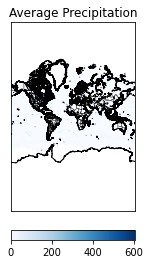

<Figure size 3600x3600 with 0 Axes>

In [7]:
mp = Basemap(projection = 'merc',
             llcrnrlon = -179,
             llcrnrlat = -89,
             urcrnrlon = 179,
             urcrnrlat = 89,
             resolution = 'i')

lon,lat = np.meshgrid(lons,lats)
x,y= mp(lon,lat)

cs = mp.pcolor(x,y,np.swapaxes(np.squeeze(prec[0,:,:]),0,1),cmap= 'Blues')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(cs,location = 'bottom',pad = '10%')

plt.title('Average Precipitation')
# lt.savefig('temp.jpg')
plt.figure(figsize=(50, 50))
plt.show()

# EDA via Xarray

In [9]:
import pandas as pd
import numpy as np
import xarray as xr

In [10]:
xdata = xr.open_dataset('/content/drive/MyDrive/w210_capstone_CEPWX/Kevin/'\
    '3B-DAY.MS.MRG.3IMERG.20200601-S000000-E235959.V06.nc4')

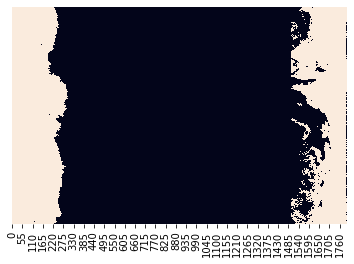

In [11]:
import seaborn as sns
sns.heatmap(xdata['precipitationCal'].isel(time=0).isnull(),yticklabels=False,cbar=False,)

<xarray.DataArray 'precipitationCal' ()>
array(2.6370914, dtype=float32)
<xarray.DataArray 'precipitationCal' ()>
array(608.1659, dtype=float32)


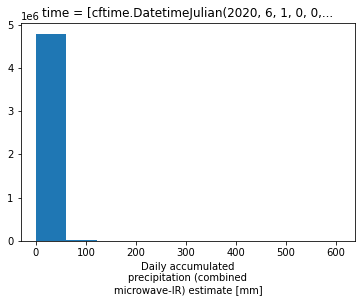

In [19]:
# distribution of the data
prec = xdata['precipitationCal']
prec.isel(time=slice(0,1)).plot.hist()
print(prec.mean()) # mm
print(prec.max()) #mm